Feature importances: [0. 1.]


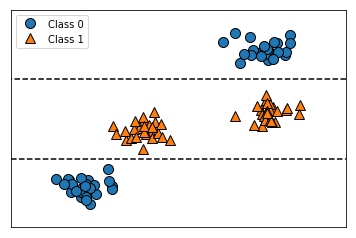

In [2]:
import mglearn
mglearn.plots.plot_tree_not_monotone()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [7]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9370629370629371


In [8]:
tree4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [9]:
print(tree4.score(X_train, y_train))
print(tree4.score(X_test, y_test))

0.9882629107981221
0.951048951048951


In [10]:
from sklearn.tree import export_graphviz
print(tree)
export_graphviz(tree, out_file='cancertree.dot', class_names=['malignant', 'benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [14]:
import os
print(os.getcwd())

C:\PythonProjects\python_playground


![](cancertree.png)

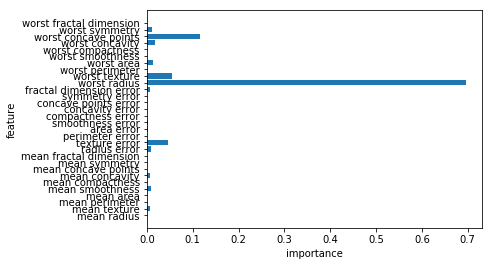

In [13]:
import numpy as np
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()